#***Student Name: Ji Qi*** , ***Session B1***

# **Import packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.mstats import winsorize

# **Upload CSV file with data**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ProjectTickers.csv 
- Import ProjectTickers.csv file
- 3 columns: **Ticker** (the stock's ticker symbol), **Name** (the name of each company), and **RetTYD** (the year-to-date stock return of each company from January 1, 2022 to April 14, 2022). 

In [ ]:
ticker = pd.read_csv('/content/drive/MyDrive/BA_870/Individual Project/ProjectTickers.csv')
ticker.head()

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456


- No missing value for ProjectTickers.csv file
- 1886 unique companies and unique RetYTDs

In [ ]:
ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1886 non-null   object 
 1   Name    1886 non-null   object 
 2   RetYTD  1886 non-null   float64
dtypes: float64(1), object(2)
memory usage: 44.3+ KB


## Project-2017-21-Returns.csv
- Download monthly stock return data from January 2017 - December 2021(60 months) for each of the stocks with tickers (1886 stocks) from CRSP on the WRDS database in the file “Project-2017-21-Returns.csv”.
- "Project-2017-21-Returns.csv" file contains 114715 data




In [ ]:
Ret17_21 = pd.read_csv('/content/drive/MyDrive/BA_870/Individual Project/Project-2017-21-Returns.csv')
Ret17_21.head()

,PERMNO,date,TICKER,RET
0,10026,20170131,JJSF,-0.043918
1,10026,20170228,JJSF,0.048836
2,10026,20170331,JJSF,0.016293
3,10026,20170428,JJSF,-0.007229
4,10026,20170531,JJSF,-0.033289


In [ ]:
Ret17_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114715 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PERMNO  114715 non-null  int64 
 1   date    114715 non-null  int64 
 2   TICKER  114653 non-null  object
 3   RET     114700 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


- In fact, Although I used 1886 tickers list to query the stock return from 2017 to 2021, the dataset I received includes 1924 tickers. My guess is that companies may change tickers or merge with other companies. This will probably cause the inconsistencies in the numer of tickers.

In [ ]:
Ret17_21.nunique()

PERMNO     1920
date         60
TICKER     1924
RET       94112
dtype: int64

- It's worth noting that the data type of RET is `object` which means is a mixture of string and floating points. I will dig into this column later when dealing with missing values.

In [ ]:
Ret17_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114715 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PERMNO  114715 non-null  int64 
 1   date    114715 non-null  int64 
 2   TICKER  114653 non-null  object
 3   RET     114700 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


- TICKER column has 62 missing values 
- RET column has 15 missing values

In [ ]:
Ret17_21.isnull().sum()

PERMNO     0
date       0
TICKER    62
RET       15
dtype: int64

## Project-2021-Financials.csv

- Download Financial Report data for the year 2021 for each of the stocks with tickers (1886 stocks) from Compustat on the WRDS database in the file “Project-2021-Financials.csv”.

- “Project-2021-Financials.csv”. file contains 1886 data

In [ ]:
fin_21 = pd.read_csv('/content/drive/MyDrive/BA_870/Individual Project/Project-2021-Financials.csv')
fin_21.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,act,...,ebit,invt,lct,lt,ni,re,sale,seq,costat,prcc_c
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,937.0,...,65.50,591.000,336.800,565.300,35.80,723.400,1651.400,974.4,A,36.22
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,17336.0,...,-5514.00,1795.000,19006.000,73807.000,-1993.00,-14580.000,29882.000,-7340.0,A,17.96
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,1551.1,...,805.31,367.167,1756.869,15981.762,618.72,3209.858,3803.835,5906.2,A,70.59
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,24239.0,...,8966.00,5157.000,13105.000,39172.000,7071.00,23154.000,43075.000,35802.0,A,140.74
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,8583.0,...,3678.00,1955.000,4240.000,4922.000,3162.00,-1454.000,16434.000,7497.0,A,143.90


In [ ]:
fin_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   act       1431 non-null   float64
 10  at        1886 non-null   float64
 11  ceq       1886 non-null   float64
 12  csho      1886 non-null   float64
 13  ebit      1886 non-null   float64
 14  invt      1852 non-null   float64
 15  lct       1431 non-null   float64
 16  lt        1881 non-null   float64
 17  ni        1886 non-null   float64
 18  re        1883 non-null   float64
 19  sale      1886 non-null   float64
 20  seq       1886 non-null   floa

- Both `act`(total current assets) and `lct` (total current liabilities) columns have 455 missing values 
- `invt`(inventory) column has 34 missing values
- `lt` (total liabilities) column has 5 missing values
- `re` (Retrained Earnings) column has 3 missing values

In [ ]:
fin_21.isnull().sum()

gvkey         0
datadate      0
fyear         0
indfmt        0
consol        0
popsrc        0
datafmt       0
tic           0
curcd         0
act         455
at            0
ceq           0
csho          0
ebit          0
invt         34
lct         455
lt            5
ni            0
re            3
sale          0
seq           0
costat        0
prcc_c        0
dtype: int64

## Project-2021-Sector.csv
- Download Compustat GGROUP for "Data Date" 2021-01 through 2021-12 from WRDS Compustat and store into "Project-2021-Sector.csv"
- tProject-2021-Sector CSV file contains 1886 data
- the `ggroup variable` represents `Industry Group GICS code`

In [ ]:
sec_21 = pd.read_csv('/content/drive/MyDrive/BA_870/Individual Project/Project-2021-Sector.csv')
sec_21.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,ggroup
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,A,2010
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,A,2030
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,A,5510
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,A,3510
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,A,4530


- No missing value for Project-2021-Sector.csv

In [ ]:
sec_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gvkey     1886 non-null   int64 
 1   datadate  1886 non-null   int64 
 2   fyear     1886 non-null   int64 
 3   indfmt    1886 non-null   object
 4   consol    1886 non-null   object
 5   popsrc    1886 non-null   object
 6   datafmt   1886 non-null   object
 7   tic       1886 non-null   object
 8   curcd     1886 non-null   object
 9   costat    1886 non-null   object
 10  ggroup    1886 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 162.2+ KB


- In total, 24 unique Industry Group GICS code for Project-2021-Sector.csv file

In [ ]:
sec_21.ggroup.nunique()

24

In [ ]:
secdf = sec_21.groupby('ggroup').tic.agg('count').to_frame().sort_values('tic', ascending = False).reset_index()
secdf['ggroup'] = secdf['ggroup'].astype('string')
secdf.rename(columns={'tic':'count'}, inplace = True)

- Count the number of stocks in each industry

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


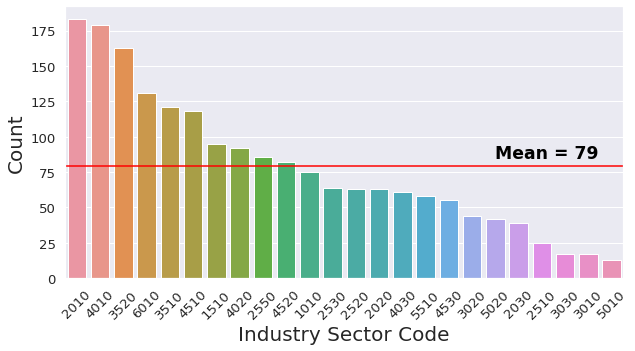

In [ ]:
sns.set(font_scale = 1.2)
plt.figure(figsize = (10, 5))
p = sns.barplot(secdf['ggroup'], secdf['count'])
p.set_xlabel("Industry Sector Code", fontsize = 20)
p.set_ylabel("Count", fontsize = 20)
plt.xticks(rotation=45)
plt.axhline(round(secdf['count'].mean()), color='red')
plt.text(18, 85, "Mean = 79", horizontalalignment='left', size='large', color='black', weight='semibold');

# **Determine Risk Exposures**

## Handel Outliers for Project-2017-21-Returns.csv

- TICKER 'NAN' has 62 missing values including "nan" and 'B'. I will drop this TICKER 'NAN' since it may be mistakenly generated by the WRDS database.

- There also exists 11 TICKERS with one missing value individually, so dropping one value of 60 values won't affect the results of risk exposures

In [ ]:
Ret17_21.loc[Ret17_21.isnull().any(axis = 1)].value_counts('TICKER', dropna=False)

TICKER
NaN      62
CASM      1
CHMT      1
CLGX      1
INSY      1
IQNT      1
JNP       1
NAV       1
OHGI      1
PIR       1
PRZM      1
TFCFA     1
dtype: int64

In [ ]:
Ret17_21[Ret17_21.TICKER.isnull()].RET.unique()

array([nan, 'B'], dtype=object)

- Drop missing values mentioned above

In [ ]:
Ret17_21 = Ret17_21.loc[~Ret17_21.isnull().any(axis = 1)]
Ret17_21.isnull().sum()

PERMNO    0
date      0
TICKER    0
RET       0
dtype: int64

- Convert `RET` from string to floating points

In [ ]:
Ret17_21.RET = pd.to_numeric(Ret17_21.RET, errors = 'coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


- Still have 13 `nan` values 

In [ ]:
Ret17_21.RET.isnull().sum()

13

- Drop 13 additional missing values 

In [ ]:
Ret17_21 = Ret17_21[~Ret17_21.RET.isnull()]
Ret17_21.isnull().sum()

PERMNO    0
date      0
TICKER    0
RET       0
dtype: int64

## Create 1886 new dataframes for each stock: monthly data

In [ ]:
# # A 1886-stocks list
# tickerlist = Ret17_21.TICKER.unique().tolist()

In [ ]:
# A 1886-stocks list
tickerlist = ticker.Ticker

In [ ]:
# Create 1886 new stock dataframes and store into a dictionary
Ret17_21_dict = {}
Ret17_21_count = []
for i in tickerlist:
  Ret17_21_dict[i] = Ret17_21[Ret17_21['TICKER'] == i]
  Ret17_21_count.append(len(Ret17_21[Ret17_21['TICKER'] == i]))

In [ ]:
# All 1886 stock tickers
len(Ret17_21_dict.keys())

1886

In [ ]:
# Display the first 120 rows (2 DataFrames:'A', 'AA')
list(Ret17_21_dict.values())[:2]

[       PERMNO      date TICKER       RET
 89546   87432  20170131      A  0.074846
 89547   87432  20170228      A  0.047580
 89548   87432  20170331      A  0.033177
 89549   87432  20170428      A  0.041233
 89550   87432  20170531      A  0.096094
 89551   87432  20170630      A -0.014882
 89552   87432  20170731      A  0.008093
 89553   87432  20170831      A  0.082455
 89554   87432  20170929      A -0.008035
 89555   87432  20171031      A  0.061713
 89556   87432  20171130      A  0.017786
 89557   87432  20171229      A -0.030633
 89558   87432  20180131      A  0.096461
 89559   87432  20180228      A -0.065913
 89560   87432  20180329      A -0.024639
 89561   87432  20180430      A -0.015112
 89562   87432  20180531      A -0.058108
 89563   87432  20180629      A -0.001292
 89564   87432  20180731      A  0.070327
 89565   87432  20180831      A  0.022714
 89566   87432  20180928      A  0.044418
 89567   87432  20181031      A -0.079402
 89568   87432  20181130      A  0

##Upload Fama-French monthly risk factor data
* Fama French Risk Factors for 2017-2021 from the file "FF-Factors-2017-2021.csv"

In [ ]:
ff_factors = pd.read_csv('/content/drive/MyDrive/BA_870/Individual Project/FF-Factors-2017-2021.csv')

### List varaibles in FF dataframe

In [ ]:
ff_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dateff  60 non-null     int64  
 1   mktrf   60 non-null     float64
 2   smb     60 non-null     float64
 3   hml     60 non-null     float64
 4   rf      60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


###Look at head and tail of FF dataframe

In [ ]:
ff_factors.head()

,dateff,mktrf,smb,hml,rf
0,20170131,0.0194,-0.0113,-0.0274,0.0004
1,20170228,0.0357,-0.0204,-0.0167,0.0004
2,20170331,0.0017,0.0113,-0.0333,0.0003
3,20170428,0.0109,0.0072,-0.0213,0.0005
4,20170531,0.0106,-0.0252,-0.0375,0.0006


In [ ]:
ff_factors.tail()

,dateff,mktrf,smb,hml,rf
55,20210831,0.0290,-0.0048,-0.0013,0.0000
56,20210930,-0.0437,0.0080,0.0509,0.0000
57,20211029,0.0665,-0.0228,-0.0044,0.0000
58,20211130,-0.0155,-0.0135,-0.0053,0.0000
59,20211231,0.0310,-0.0157,0.0323,0.0001


### Rename date column to "date" to match WRDS data "date" column for 1886 monthly stocks

In [ ]:
ff_factors.rename(columns={'dateff':'date'}, inplace=True)
ff_factors.head()

,date,mktrf,smb,hml,rf
0,20170131,0.0194,-0.0113,-0.0274,0.0004
1,20170228,0.0357,-0.0204,-0.0167,0.0004
2,20170331,0.0017,0.0113,-0.0333,0.0003
3,20170428,0.0109,0.0072,-0.0213,0.0005
4,20170531,0.0106,-0.0252,-0.0375,0.0006


## Merge the 1886 monthly stock return data and Fama-French market data based on "date"
* Then list head and tail of dataframe for A

In [ ]:
stockret_ff = {}
Ret17_21_count = []
for i in Ret17_21_dict.keys():
  stockret_ff[i] = pd.merge(Ret17_21_dict[i], ff_factors, on = 'date', how = 'inner')
  Ret17_21_count.append(len(stockret_ff[i]))

In [ ]:
stockret_ff['A'].head()

,PERMNO,date,TICKER,RET,mktrf,smb,hml,rf
0,87432,20170131,A,0.074846,0.0194,-0.0113,-0.0274,0.0004
1,87432,20170228,A,0.047580,0.0357,-0.0204,-0.0167,0.0004
2,87432,20170331,A,0.033177,0.0017,0.0113,-0.0333,0.0003
3,87432,20170428,A,0.041233,0.0109,0.0072,-0.0213,0.0005
4,87432,20170531,A,0.096094,0.0106,-0.0252,-0.0375,0.0006


In [ ]:
stockret_ff['A'].tail()

,PERMNO,date,TICKER,RET,mktrf,smb,hml,rf
55,87432,20210831,A,0.145141,0.0290,-0.0048,-0.0013,0.0000
56,87432,20210930,A,-0.102240,-0.0437,0.0080,0.0509,0.0000
57,87432,20211029,A,0.000978,0.0665,-0.0228,-0.0044,0.0000
58,87432,20211130,A,-0.041844,-0.0155,-0.0135,-0.0053,0.0000
59,87432,20211231,A,0.057985,0.0310,-0.0157,0.0323,0.0001


- Create a Dataframe for checking the total amount of monthly stock risk exposure factors for each stock from 2017 to 2021

In [ ]:
expfa = pd.DataFrame({'tic':tickerlist.tolist(), 'count':Ret17_21_count})

- All 11 companies has less than 60 montly risk exposures

In [ ]:
expfa[expfa['count'] < 60]

,tic,count
3,AAN,59
118,ANAB,59
151,ARNC,59
396,CNDT,59
697,FOXA,59
805,HGV,59
944,JELD,59
948,JNCE,59
1368,PK,59
1451,REVG,59


In [ ]:
expfa['count'].value_counts().reset_index().rename(columns={'index': '# of monthly risk exposures'})

,# of monthly risk exposures,count
0,60,1875
1,59,11


## Run OLS regression for 1886 stocks (60 months) using FF 3-factor model:
* [Ret(stock)-Rf] = alpha + B1(RetMkt-Rf) + b2(SMB) + b3(HML) + e

In [ ]:
# Create a empty output dataframe
output = pd.DataFrame(columns = ['TICKER', 'R-squared', 'Adj. R-squared', 'const', 'mktrf', 'smb', 'hml'])
output

,TICKER,R-squared,Adj. R-squared,const,mktrf,smb,hml


In [ ]:
# Define a Linear Regression function for FF model
def ffmodel(data,i):
  y = data[i]["RET"] - data[i]["rf"]
  X = data[i][['mktrf' , 'smb' , 'hml']] 
  # Use statsmodels
  X = sm.add_constant(X) # adding a constant
  model = sm.OLS(y, X).fit()

  #return regression output
  return (i, model.rsquared, model.rsquared_adj, 
          model.params[0], model.params[1],
          model.params[2],model.params[3])

for i in list(stockret_ff.keys())[:]:
  output.loc[len(output.index)] = ffmodel(stockret_ff, i)

# Display the output regression statistics
output

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,TICKER,R-squared,Adj. R-squared,const,mktrf,smb,hml
0,A,0.498110,0.471223,0.007241,1.014152,-0.253674,-0.143608
1,AA,0.539152,0.514464,0.014194,1.984149,0.527862,1.924844
2,AAL,0.528181,0.502905,-0.017850,1.315550,0.612825,1.248123
3,AAN,0.388654,0.355308,0.009753,1.648965,0.242525,0.815613
4,AAON,0.167367,0.122761,0.008716,0.516779,0.422130,-0.117068
...,...,...,...,...,...,...,...
1881,ZEN,0.489536,0.462189,0.010584,1.026803,1.363839,-0.774104
1882,ZION,0.795943,0.785011,0.004964,1.084739,0.869374,1.151468
1883,ZNGA,0.176268,0.132140,0.012054,0.101034,1.200987,-0.714916
1884,ZTS,0.377264,0.343903,0.014726,0.728418,-0.560814,-0.179065


In [ ]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TICKER          1886 non-null   object 
 1   R-squared       1886 non-null   float64
 2   Adj. R-squared  1886 non-null   float64
 3   const           1886 non-null   float64
 4   mktrf           1886 non-null   float64
 5   smb             1886 non-null   float64
 6   hml             1886 non-null   float64
dtypes: float64(6), object(1)
memory usage: 117.9+ KB


In [ ]:
output.describe().T

,count,mean,std,min,25%,50%,75%,max
R-squared,1886.0,0.382156,0.185622,0.002022,0.235846,0.380695,0.516755,0.866154
Adj. R-squared,1886.0,0.349054,0.195568,-0.051441,0.194909,0.347518,0.490867,0.858983
const,1886.0,0.004178,0.017644,-0.079578,-0.003677,0.002600,0.009878,0.433986
mktrf,1886.0,1.065523,0.624864,-6.676723,0.720385,1.007568,1.337691,6.002016
smb,1886.0,0.667360,1.232145,-6.286219,0.016011,0.501588,1.019407,31.005941
hml,1886.0,0.317198,0.699372,-3.593321,-0.047773,0.360752,0.760726,5.919490


In [ ]:
print("{0}% of smb beta is more than 0".format(round(len(output[output.smb > 0]) / len(output),2) * 100))

76.0% of smb beta is more than 0


In [ ]:
print("{0}% of hml beta is more than 0".format(round(len(output[output.hml > 0]) / len(output),2) * 100))

73.0% of hml beta is more than 0


- Calculate outlier percentages for all 3 factor betas using IQR

In [ ]:
ffiqr = []
for i in list(output.columns)[-3:]:
  Q1 = output[i].quantile(0.25)
  Q3 = output[i].quantile(0.75)
  IQR = Q3 - Q1
  high = Q3 + 1.5 * IQR
  low = Q1 - 1.5 * IQR
  ffiqr.append(round(len(output[(output[i] > high) |(output[i] < low)]) / len(output),2))
  
pd.DataFrame({'Risk Factor':list(output.columns)[-3:], 'Outlier Ratio':ffiqr})

,Risk Factor,Outlier Ratio
0,mktrf,0.04
1,smb,0.04
2,hml,0.03


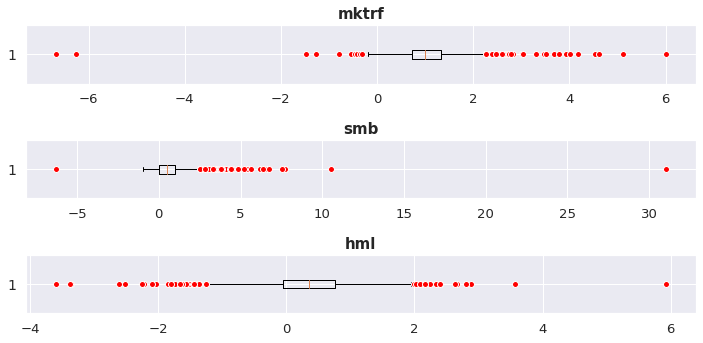

In [ ]:
#Creating boxplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
output1 = output.iloc[:,4:]

fig, axs = plt.subplots(3,1, figsize=(10,5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(output1.iloc[:,i], flierprops=red_circle, meanprops=mean_shape, vert = False)
    ax.set_title(output1.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

## Data Merging (ProjectTickers.csv & FF-Exposures dataframe)

In [ ]:
ffexp = pd.merge(ticker, output, left_on = 'Ticker', right_on = 'TICKER', how = 'left').iloc[:,1:]

## Export FF-Exposures.csv file

In [ ]:
# Store the output into a csv file
output_file = ffexp.to_csv('FF-Exposures.csv', index = False)

# **Calculate Financial Ratios**

## Data Merging (ProjectTickers.csv & Project-2021-Financials.csv)

- No missing value for this merged dataset

In [ ]:
fin = pd.merge(ticker, fin_21, how = 'outer', left_on= 'Ticker', right_on= 'tic', indicator= True)
fin._merge.value_counts()

both          1886
left_only        0
right_only       0
Name: _merge, dtype: int64

- Both `act`(total current assets) and `lct` (total current liabilities) 
columns have 455 missing values 
- `invt` (inventory) column has 34 missing values
- `lt` (total liabilities) column has 5 missing values
- `re` (Retrained Earnings) column has 3 missing values

In [ ]:
fin.isnull().sum().to_frame().reset_index().rename(columns={'index':'fin variable', 0:'count'}).sort_values('count', ascending = False).iloc[:5]

,fin variable,count
18,lct,455
12,act,455
17,invt,34
19,lt,5
21,re,3


- Merge Project-2021-Financials with Project-2021-Sector

In [ ]:
fin_sec = pd.merge(fin_21, sec_21, how = 'outer', on= 'tic', indicator= True)
fin_sec._merge.value_counts()

both          1886
left_only        0
right_only       0
Name: _merge, dtype: int64

- Bank and Real Estate industries have more missing values in total assets and total liabilities

In [ ]:
fin_sec[fin_sec.lct.isnull()].groupby('ggroup').agg({'ggroup':'count'}).rename(columns={'ggroup': 'count'}).reset_index().sort_values('count', ascending = False)

,ggroup,count
4,4010,179
10,6010,114
5,4020,74
6,4030,54
1,2520,15
0,2010,10
3,2550,3
7,4510,3
2,2530,1
8,5020,1


## Fill the NaN values using the Median and Predictive Model

### Data Imputation for `Retrained Earnings` Using Median Value

In [ ]:
fin['re'] = fin['re'].fillna(fin['re'].median(skipna = True))
fin['re'].isnull().sum()

0

### Data Imputation for `Total Liabilities` Using Median Value

In [ ]:
fin['lt'] = fin['lt'].fillna(fin['lt'].median(skipna = True))
fin['lt'].isnull().sum()

0

### Data Imputation for `Inventory` Using Median Value

In [ ]:
fin['invt'] = fin['invt'].fillna(fin['invt'].median(skipna = True))
fin['invt'].isnull().sum()

0

### Data Imputation for `Current Assets` (Random Forest)

In [ ]:
# DataFrame without any missing value
fin_nan_ca = fin[~fin.isna().any(axis=1)]
fin_nan_ca

,Ticker,Name,RetYTD,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,...,invt,lct,lt,ni,re,sale,seq,costat,prcc_c,_merge
0,A,Agilent Technologies,-0.2080,126554,20211031,2021,INDL,C,D,STD,...,830.000,1708.000,5316.000,1210.000,66.000,6319.000,5389.000,A,159.65,both
1,AA,Alcoa Corp,0.4731,27638,20211231,2021,INDL,C,D,STD,...,1956.000,3223.000,8741.000,429.000,-4907.000,12152.000,4672.000,A,59.58,both
2,AAL,American Airlines Gp,0.0579,1045,20211231,2021,INDL,C,D,STD,...,1795.000,19006.000,73807.000,-1993.000,-14580.000,29882.000,-7340.000,A,17.96,both
4,AAON,Aaon Inc,-0.3456,21542,20211231,2021,INDL,C,D,STD,...,136.019,86.768,184.010,58.758,384.306,534.517,466.170,A,79.43,both
5,AAP,Advance Auto Parts Inc,-0.0884,145977,20211231,2021,INDL,C,D,STD,...,4659.018,5180.307,9065.918,616.108,4583.164,10997.989,3128.291,A,239.88,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,ZBRA,Zebra Technologies,-0.3386,24405,20211231,2021,INDL,C,D,STD,...,491.000,1800.000,3231.000,837.000,3544.000,5627.000,2984.000,A,595.20,both
1881,ZEN,Zendesk Inc,0.2002,20229,20211231,2021,INDL,C,D,STD,...,0.000,911.339,1962.061,-223.644,-1149.154,1338.603,489.218,A,104.29,both
1883,ZNGA,Zynga Inc Cl A,0.3969,187576,20211231,2021,INDL,C,D,STD,...,0.000,1563.400,3247.000,-104.200,-2513.100,2800.500,3111.900,A,6.40,both
1884,ZTS,Zoetis Inc Cl A,-0.2325,13721,20211231,2021,INDL,C,D,STD,...,1923.000,1797.000,9356.000,2037.000,6422.000,7786.000,4543.000,A,244.03,both


In [ ]:
# Select useful columns
fin_nan_ca = fin_nan_ca[['act', 'at', 'ceq', 'csho', 'lct', 'lt', 're', 'sale',
       'seq', 'prcc_c']]

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

Xpca = fin_nan_ca.drop(columns={'act', 'lct'})
ypca = fin_nan_ca['act']
 
# fit the regressor with x and y data
regressor.fit(Xpca, ypca)

RandomForestRegressor(random_state=0)

In [ ]:
print('R squared for the Random Forest method is around {:.4f}.'.format(regressor.score(Xpca, ypca)))

R squared for the Random Forest method is around 0.9552.


In [ ]:
CA = fin.iloc[fin[fin.isnull().any(axis =1)].index,:][['at', 'ceq', 'csho', 'lt', 're', 'sale',
       'seq', 'prcc_c']]

- Predict `Current Assets` for the missing rows

In [ ]:
fin.loc[fin[fin.isnull().any(axis =1)].index,['act']] = regressor.predict(CA)

### Data Imputation for `CURRENT LIABIL` (Linear Regression)

In [ ]:
# DataFrame without any missing value
fin_nan_cl = fin[~fin.isna().any(axis=1)]
fin_nan_cl

,Ticker,Name,RetYTD,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,...,invt,lct,lt,ni,re,sale,seq,costat,prcc_c,_merge
0,A,Agilent Technologies,-0.2080,126554,20211031,2021,INDL,C,D,STD,...,830.000,1708.000,5316.000,1210.000,66.000,6319.000,5389.000,A,159.65,both
1,AA,Alcoa Corp,0.4731,27638,20211231,2021,INDL,C,D,STD,...,1956.000,3223.000,8741.000,429.000,-4907.000,12152.000,4672.000,A,59.58,both
2,AAL,American Airlines Gp,0.0579,1045,20211231,2021,INDL,C,D,STD,...,1795.000,19006.000,73807.000,-1993.000,-14580.000,29882.000,-7340.000,A,17.96,both
4,AAON,Aaon Inc,-0.3456,21542,20211231,2021,INDL,C,D,STD,...,136.019,86.768,184.010,58.758,384.306,534.517,466.170,A,79.43,both
5,AAP,Advance Auto Parts Inc,-0.0884,145977,20211231,2021,INDL,C,D,STD,...,4659.018,5180.307,9065.918,616.108,4583.164,10997.989,3128.291,A,239.88,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,ZBRA,Zebra Technologies,-0.3386,24405,20211231,2021,INDL,C,D,STD,...,491.000,1800.000,3231.000,837.000,3544.000,5627.000,2984.000,A,595.20,both
1881,ZEN,Zendesk Inc,0.2002,20229,20211231,2021,INDL,C,D,STD,...,0.000,911.339,1962.061,-223.644,-1149.154,1338.603,489.218,A,104.29,both
1883,ZNGA,Zynga Inc Cl A,0.3969,187576,20211231,2021,INDL,C,D,STD,...,0.000,1563.400,3247.000,-104.200,-2513.100,2800.500,3111.900,A,6.40,both
1884,ZTS,Zoetis Inc Cl A,-0.2325,13721,20211231,2021,INDL,C,D,STD,...,1923.000,1797.000,9356.000,2037.000,6422.000,7786.000,4543.000,A,244.03,both


- Select useful columns for the independent varibales
- add a intercept column

In [ ]:
fin_nan_cl = fin_nan_cl[['act', 'at', 'ceq', 'csho', 'lct', 'lt', 're', 'sale',
       'seq', 'prcc_c']]
fin_nan_cl['constant'] = 1 # add a intercept

Xcl = fin_nan_cl.drop(columns={'lct'})
ycl = fin_nan_cl[['lct']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- Run the linear regression model 

In [ ]:
modelcl = sm.OLS(ycl, Xcl)
resultscl = modelcl.fit()
print(resultscl.summary())

                            OLS Regression Results                            
Dep. Variable:                    lct   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2824.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:02:25   Log-Likelihood:                -13255.
No. Observations:                1431   AIC:                         2.653e+04
Df Residuals:                    1421   BIC:                         2.658e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
act            0.6258      0.010     62.595      0.0

In [ ]:
print('R squared for the Linear Regression method is around {:.4f}.'.format(resultscl.rsquared))

R squared for the Linear Regression method is around 0.9470.


- Predict `Current Liabilities` for the missing rows

In [ ]:
CL = fin[fin.isna().any(axis=1)][['act', 'at', 'ceq', 'csho', 'lt', 're', 'sale',
       'seq', 'prcc_c']]
CL['constant'] = 1
resultscl.predict(CL)

3         340.987495
7         346.592838
11       4282.208122
15       2364.170964
17       1397.479158
            ...     
1857    10389.769104
1859    -1066.976318
1861     3221.686199
1869      252.535794
1882    16590.685451
Length: 455, dtype: float64

- No missing values for Financial Report Data

In [ ]:
fin.loc[CL.index,['lct']] = resultscl.predict(CL)
fin.isnull().sum()

Ticker      0
Name        0
RetYTD      0
gvkey       0
datadate    0
fyear       0
indfmt      0
consol      0
popsrc      0
datafmt     0
tic         0
curcd       0
act         0
at          0
ceq         0
csho        0
ebit        0
invt        0
lct         0
lt          0
ni          0
re          0
sale        0
seq         0
costat      0
prcc_c      0
_merge      0
dtype: int64

## Feature Engineering (Creates 4 Market Ratios)
- **Market Value Ratios**
  - Price/Book = (PRCC_C * CSHO ) / CEQ
  - P/E = (PRCC_C * CSHO ) / NI
  - P/EBIT = (PRCC_C * CSHO ) / EBIT
  - P/SALES = (PRCC_C * CSHO ) / SALES

- **Efficiency Ratios**
  <!-- - Current Ratio = CURRENT ASSETS / CURRENT LIABIL -->
  - Retention Ratio = Retained Earnings / Net Income 
  - Quick Ratio = CURRENT ASSETS - Inventory / CURRENT LIABIL
​
- **Debt Management Ratios**
  - Debt ratio = Total liabilities / Total Assets

<!-- - **Asset Management Ratios**
  - RE = RETAINED EARNINGS / TOTAL ASSETS  -->

- **Profitability Ratios**
  <!-- - NET PROFIT MARGIN = NI / TOTAL SALES -->
  - Return on Assets = NI / TOTAL ASSETS
  - Return on Equity = NI / Shareholder Equity
  - Asset Turnover Ratio = Total Sales / Total Assets
---
- Invert each of those ratios to make them "better behaved".
  - Book/Price = 1/[Price/Book]
  - E/P = 1/[P/E]
  - EBIT/P = 1/[P/EBIT]
  - SALE/P = 1/[P/SALES]

In [ ]:
# Market ratios
fin['B/P'] = fin['ceq'] / (fin['prcc_c'] * fin['csho'])
fin['E/P'] = fin['ni'] / (fin['prcc_c'] * fin['csho'])
fin['ebit/P'] = fin['ebit'] / (fin['prcc_c'] * fin['csho']) 
fin['sale/P'] = fin['sale'] / (fin['prcc_c'] * fin['csho']) 

# Efficiency Ratios
# fin['curr_ratio'] = fin['act'] / fin['lct']
fin['rent_ratio'] = fin['re'] / fin['ni']
fin['quick_ratio'] = (fin['act'] - fin['invt']) / fin['lct']

# Debt Management Ratios
fin['debt_ratio'] = fin['lt'] / fin['at']

# Profitability Ratios
# fin['net_profit_margin'] = fin['ni'] / fin['sale']
fin['ROA'] = fin['ni'] / fin['at']
fin['ROE'] = fin['ni'] / fin['seq'] 
fin['ATR'] = fin['sale'] / fin['at'] 

## Check and Handle outliers

- Create a new dataframe by selecting the 10 finance ratios as the independent variables and RetYTD as a dependent variable.

In [ ]:
fin.columns

Index(['Ticker', 'Name ', 'RetYTD', 'gvkey', 'datadate', 'fyear', 'indfmt',
       'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'act', 'at', 'ceq',
       'csho', 'ebit', 'invt', 'lct', 'lt', 'ni', 're', 'sale', 'seq',
       'costat', 'prcc_c', '_merge', 'B/P', 'E/P', 'ebit/P', 'sale/P',
       'rent_ratio', 'quick_ratio', 'debt_ratio', 'ROA', 'ROE', 'ATR'],
      dtype='object')

In [ ]:
fin = fin[['Ticker', 'Name ', 'RetYTD', 'B/P', 'E/P', 'ebit/P', 'sale/P',
       'rent_ratio','quick_ratio', 'debt_ratio', 'ROA', 'ROE', 'ATR']]
fin.head()

,Ticker,Name,RetYTD,B/P,E/P,ebit/P,sale/P,rent_ratio,quick_ratio,debt_ratio,ROA,ROE,ATR
0,A,Agilent Technologies,-0.2080,0.111695,0.025079,0.029204,0.130970,0.054545,1.738290,0.496590,0.113031,0.224531,0.590285
1,AA,Alcoa Corp,0.4731,0.425940,0.039111,0.189357,1.107882,-11.438228,0.952529,0.581764,0.028552,0.091824,0.808785
2,AAL,American Airlines Gp,0.0579,-0.630953,-0.171320,-0.473988,2.568684,7.315605,0.817689,1.110431,-0.029985,0.271526,0.449576
3,AAN,Aarons Holdings Company,-0.1327,0.940491,0.143967,0.206699,2.416822,0.889688,2.044556,0.501711,0.076276,0.153076,1.280475
4,AAON,Aaon Inc,-0.3456,0.111730,0.014083,0.017648,0.128111,6.540488,0.945752,0.283014,0.090372,0.126044,0.822106


- No missing value for each created financial ratios

In [ ]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticker       1886 non-null   object 
 1   Name         1886 non-null   object 
 2   RetYTD       1886 non-null   float64
 3   B/P          1886 non-null   float64
 4   E/P          1886 non-null   float64
 5   ebit/P       1886 non-null   float64
 6   sale/P       1886 non-null   float64
 7   rent_ratio   1886 non-null   float64
 8   quick_ratio  1886 non-null   float64
 9   debt_ratio   1886 non-null   float64
 10  ROA          1886 non-null   float64
 11  ROE          1886 non-null   float64
 12  ATR          1886 non-null   float64
dtypes: float64(11), object(2)
memory usage: 270.8+ KB


- Create a dataframe containing only 10 financial ratios

In [ ]:
df_model = fin.iloc[:, 3:]
df_model

,B/P,E/P,ebit/P,sale/P,rent_ratio,quick_ratio,debt_ratio,ROA,ROE,ATR
0,0.111695,0.025079,0.029204,0.130970,0.054545,1.738290,0.496590,0.113031,0.224531,0.590285
1,0.425940,0.039111,0.189357,1.107882,-11.438228,0.952529,0.581764,0.028552,0.091824,0.808785
2,-0.630953,-0.171320,-0.473988,2.568684,7.315605,0.817689,1.110431,-0.029985,0.271526,0.449576
3,0.940491,0.143967,0.206699,2.416822,0.889688,2.044556,0.501711,0.076276,0.153076,1.280475
4,0.111730,0.014083,0.017648,0.128111,6.540488,0.945752,0.283014,0.090372,0.126044,0.822106
...,...,...,...,...,...,...,...,...,...,...
1881,0.038577,-0.017636,-0.011941,0.105556,5.138318,1.556646,0.800423,-0.091236,-0.457146,0.546083
1882,0.733347,0.117891,0.188062,0.310130,4.512843,0.307874,0.919925,0.012114,0.151280,0.031867
1883,0.430106,-0.014402,0.032535,0.387066,24.118042,1.054497,0.510623,-0.016386,-0.033484,0.440406
1884,0.039394,0.017664,0.024618,0.067515,3.152676,2.786311,0.673094,0.146547,0.448382,0.560144


In [ ]:
df_model.describe()

,B/P,E/P,ebit/P,sale/P,rent_ratio,quick_ratio,debt_ratio,ROA,ROE,ATR
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.422120,0.027009,0.060538,0.765997,7.065172,1.650150,0.646549,0.023572,0.009034,0.642005
std,0.424100,0.136353,0.130324,1.439881,220.549098,21.836019,0.425294,0.171422,10.339557,0.616868
min,-2.056645,-1.891725,-1.334204,-0.087004,-3248.673575,-924.116120,0.008474,-1.759213,-364.326147,-0.009803
25%,0.161112,0.008113,0.019641,0.176223,0.439140,0.765277,0.460233,0.007584,0.024152,0.185607
50%,0.337004,0.036704,0.056821,0.350729,3.695886,1.213342,0.633081,0.034187,0.112438,0.511923
75%,0.613868,0.076322,0.113822,0.814565,6.611482,2.122198,0.802777,0.079409,0.212665,0.900111
max,7.547555,0.898517,0.974888,27.543662,8515.124088,91.177254,9.901970,1.484070,216.142857,6.389003


- below are the boxplots for all those finance ratios.

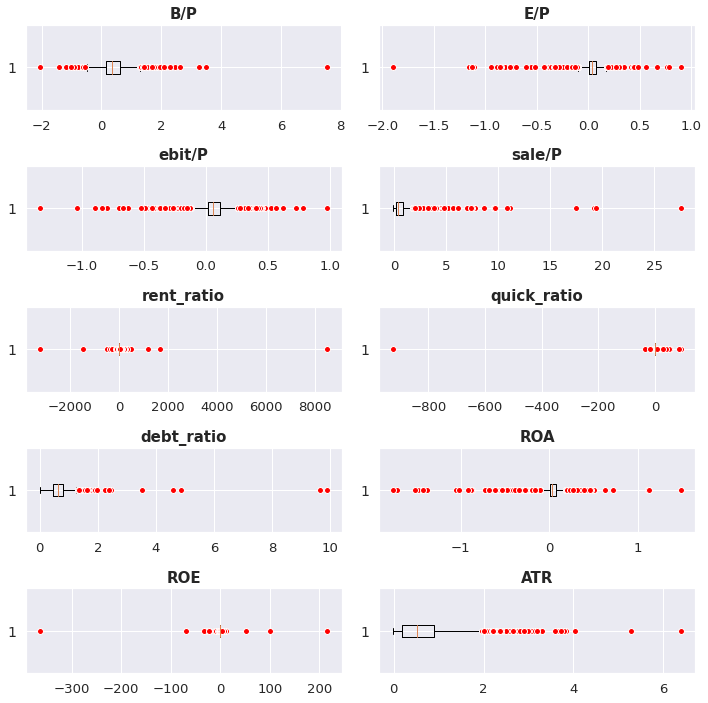

In [ ]:
#Creating boxplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig, axs = plt.subplots(5,2, figsize=(10,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_model.iloc[:,i], flierprops=red_circle, meanprops=mean_shape, vert = False)
    ax.set_title(df_model.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

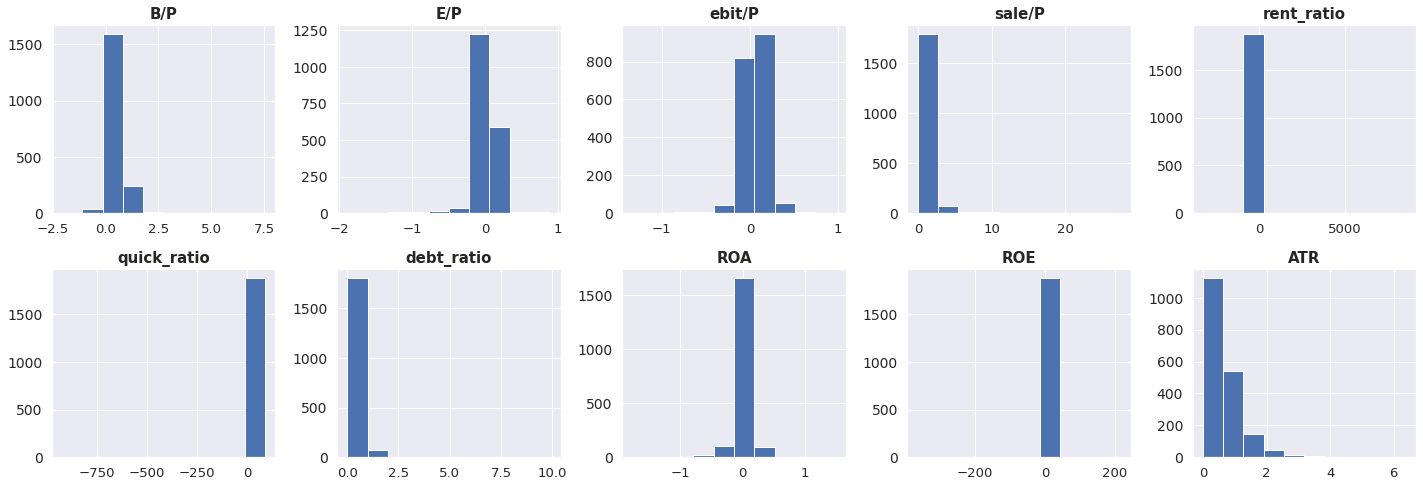

In [ ]:
#Check the outlier using histogram
fig, axs = plt.subplots(2,5, figsize=(20,7))

for i, ax in enumerate(axs.flat):
    ax.hist(df_model.iloc[:,i])
    ax.set_title(df_model.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

### Summary I

- According to the multiple box plots above, every column has several outliers above 75 percentile and below 25 percentile. However, **sale / price**, **debt ratio** and **Asset Turnover Ratio** only have outliers which are above 75 percentile. In other words, the distribution of thoes three ratios are right-skewed. Especially, **rent_ratio** has extreme values compares to its 25 and 75 percentile values

- Since, we only have 1886 data points, dropping some outliers may decrease the model predictive power

- I will use Winsorization method to deal with outliers before establishing the linear regression models

###  Winsorization Method

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
df_win = df_model.copy()
for i in df_model.columns:
  df_win[i] = winsorize(df_model[i], (0.01, 0.02))

df_win.describe()

,B/P,E/P,ebit/P,sale/P,rent_ratio,quick_ratio,debt_ratio,ROA,ROE,ATR
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.414033,0.028158,0.060454,0.687720,3.018709,1.906921,0.626141,0.024837,0.075062,0.626616
std,0.343580,0.102961,0.107562,0.854932,16.455807,2.180792,0.241628,0.128383,0.546444,0.549811
min,-0.337273,-0.521213,-0.378436,0.000060,-96.808868,-2.169569,0.086737,-0.612289,-3.335815,0.000132
25%,0.161112,0.008113,0.019641,0.176223,0.439140,0.765277,0.460233,0.007584,0.024152,0.185607
50%,0.337004,0.036704,0.056821,0.350729,3.695886,1.213342,0.633081,0.034187,0.112438,0.511923
75%,0.613868,0.076322,0.113822,0.814565,6.611482,2.122198,0.802777,0.079409,0.212665,0.900111
max,1.377565,0.231730,0.329366,4.063661,52.040147,10.989332,1.198789,0.266337,1.555145,2.370510


- Check the outliers after winsorization

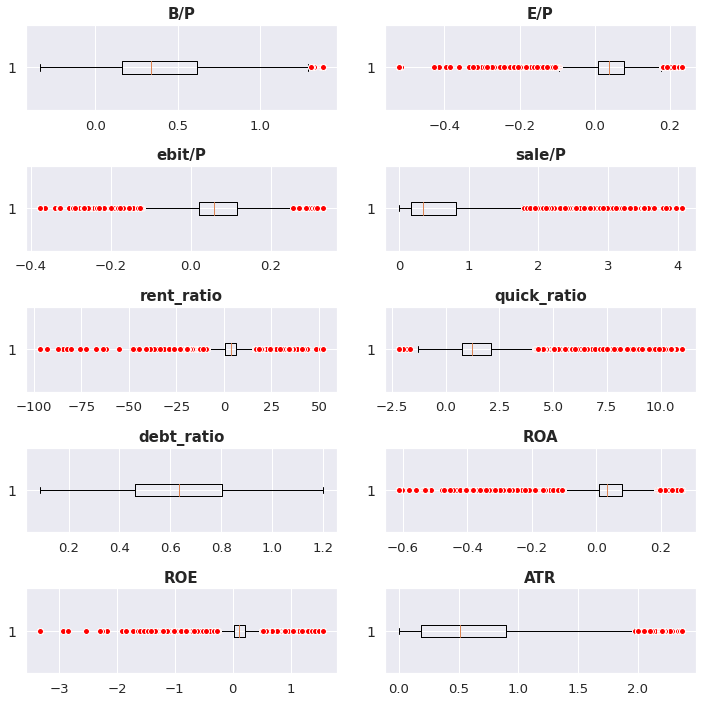

In [ ]:
#Check the outlier after Log Transformation
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig, axs = plt.subplots(5,2, figsize=(10,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_win.iloc[:,i], flierprops=red_circle, meanprops=mean_shape, vert = False)
    ax.set_title(df_win.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

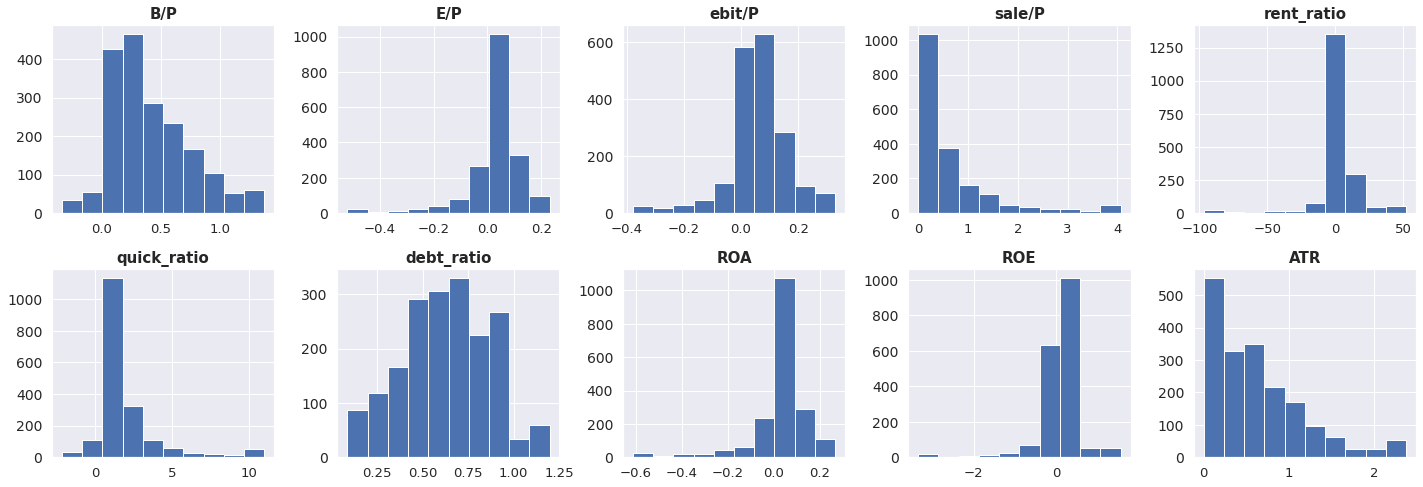

In [ ]:
#Check the outlier after Log Transformation
fig, axs = plt.subplots(2,5, figsize=(20,7))

for i, ax in enumerate(axs.flat):
    ax.hist(df_win.iloc[:,i])
    ax.set_title(df_win.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

### Summary II

- After Winsorization, **sale / price** and **Asset Turnover Ratio** are still right-skewed and **quick ratio** and **rent_ratio** are converted to a normal distribution. The good news is that the distributions of the rest 6 ratios are more close to normal, which is proved by the above 6 histograms and 6 boxplots.

In [ ]:
fin.iloc[:,:3]

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456
...,...,...,...
1881,ZEN,Zendesk Inc,0.2002
1882,ZION,Zions Bancorp,-0.0038
1883,ZNGA,Zynga Inc Cl A,0.3969
1884,ZTS,Zoetis Inc Cl A,-0.2325


## Export Fin-Ratios.csv file

In [ ]:
fin_ratios = pd.concat([fin.iloc[:,:3], df_win], axis = 1)

In [ ]:
fin_ratios.to_csv('Fin-Ratios.csv', index = False) 

# **Industry Indicators**

## Data Merging (Project-2021-Sector.csv & ProjectTickers.csv)

In [ ]:
industry = pd.merge(sec_21, ticker, how = 'outer', left_on= 'tic', right_on= 'Ticker', indicator= True)
industry._merge.value_counts()

both          1886
left_only        0
right_only       0
Name: _merge, dtype: int64

- No missing value for this merged dataset

In [ ]:
industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gvkey     1886 non-null   int64   
 1   datadate  1886 non-null   int64   
 2   fyear     1886 non-null   int64   
 3   indfmt    1886 non-null   object  
 4   consol    1886 non-null   object  
 5   popsrc    1886 non-null   object  
 6   datafmt   1886 non-null   object  
 7   tic       1886 non-null   object  
 8   curcd     1886 non-null   object  
 9   costat    1886 non-null   object  
 10  ggroup    1886 non-null   int64   
 11  Ticker    1886 non-null   object  
 12  Name      1886 non-null   object  
 13  RetYTD    1886 non-null   float64 
 14  _merge    1886 non-null   category
dtypes: category(1), float64(1), int64(4), object(9)
memory usage: 223.0+ KB


## Export Industry.csv file

In [ ]:
industry[['Ticker','Name ','ggroup', 'RetYTD']].to_csv('Industry.csv', index = False)

## Create Industry Indicator (category) variables for the 24 Industry categories 

- Select useful columns for the downstream tasks

In [ ]:
industry = industry[['Ticker', 'ggroup', 'RetYTD']]
industry.head()

,Ticker,ggroup,RetYTD
0,AIR,2010,0.2944
1,AAL,2030,0.0579
2,PNW,5510,0.0985
3,ABT,3510,-0.1638
4,AMD,4530,-0.3533


In [ ]:
industry.groupby('ggroup')[['RetYTD']].agg('mean').sort_values("RetYTD")

,RetYTD
ggroup,
4530,-0.252813
2520,-0.208598
2510,-0.207992
4520,-0.172065
3520,-0.163937
3030,-0.153771
2550,-0.151223
4020,-0.122515
4510,-0.108644


In [ ]:
industry_new = pd.get_dummies(industry, columns=['ggroup'])
industry_new

,Ticker,RetYTD,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,...,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010
0,AIR,0.2944,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AAL,0.0579,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PNW,0.0985,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ABT,-0.1638,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AMD,-0.3533,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,KRG,0.0275,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1882,LYB,0.1664,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1883,FRO,0.3380,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1884,ALLE,-0.1888,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Run OLS explanatory for 4 categories**

## a. Risk Regressions:

### Ret(i) = a + b1 * MktExposure(i) + b2 * SizeExposure(i) + b3 * ValueExposure(i) + e

In [ ]:
ffexp

,Name,RetYTD,TICKER,R-squared,Adj. R-squared,const,mktrf,smb,hml
0,Agilent Technologies,-0.2080,A,0.498110,0.471223,0.007241,1.014152,-0.253674,-0.143608
1,Alcoa Corp,0.4731,AA,0.539152,0.514464,0.014194,1.984149,0.527862,1.924844
2,American Airlines Gp,0.0579,AAL,0.528181,0.502905,-0.017850,1.315550,0.612825,1.248123
3,Aarons Holdings Company,-0.1327,AAN,0.388654,0.355308,0.009753,1.648965,0.242525,0.815613
4,Aaon Inc,-0.3456,AAON,0.167367,0.122761,0.008716,0.516779,0.422130,-0.117068
...,...,...,...,...,...,...,...,...,...
1881,Zendesk Inc,0.2002,ZEN,0.489536,0.462189,0.010584,1.026803,1.363839,-0.774104
1882,Zions Bancorp,-0.0038,ZION,0.795943,0.785011,0.004964,1.084739,0.869374,1.151468
1883,Zynga Inc Cl A,0.3969,ZNGA,0.176268,0.132140,0.012054,0.101034,1.200987,-0.714916
1884,Zoetis Inc Cl A,-0.2325,ZTS,0.377264,0.343903,0.014726,0.728418,-0.560814,-0.179065


### Interpret and explain your findings (focus on R2, Adj R2 and coefficients)

In [ ]:
ffexp['constant'] = 1 # intercept
Xff = ffexp[['mktrf', 'smb', 'hml'	,'constant']]
yff = ffexp['RetYTD']

modelff = sm.OLS(yff, Xff)
resultsff = modelff.fit()
print(resultsff.summary())

                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     65.53
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           2.66e-40
Time:                        02:02:37   Log-Likelihood:                 79.981
No. Observations:                1886   AIC:                            -152.0
Df Residuals:                    1882   BIC:                            -129.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mktrf          0.0082      0.009      0.952      0.3

### Summary 

* Based on the **R2 and AdjR2**, we found that this model using **Risk Exposure Betas** indicates only **9.5% / 9.3%** of RetYTD could be explained by those 3 independent variables.

* The model summary shows that the coefficients of **Size Risk Exposure Beta** and **Value Risk Exposure Beta** are **statistically significant at 5%**. In addition, **|t-values|** for two independent variables are **|-2.739| and |13.818|**, respectively and both are **more than 1.96**, which also proves that coefficients for those 2 variables are **significant different from 0 at 5% level**. 

  - **On average, for 0.5 increase in *Market Risk Exposure Beta*, the RetYTD will increase 0.0082**.**95% of coefficients of Market Risk Exposure Beta** are within [-0.009, 0.025].

  - **On average, for 0.5 increase in *Size Risk Exposure Beta*, the RetYTD will decrease by 0.0120**.**95% of coefficients of Size Risk Exposure Beta** are within [-0.021, -0.003]. In 1886 company stocks, **76% are small company stocks** which indicates that **positive Size Risk Exposure Beta** will have a corresponding **negative cofficients, which drop RetYTD** 

  - **On average, for 0.5 increase in *Value Risk Exposure Beta*, the RetYTD will increase by 0.1068**. **95% of coefficients of Value Risk Exposure Beta** are within [0.092, 0.122]. In 1886 company stocks **73% are value company stocks** which indicates that **positive Value Risk Exposure Beta** will have a corresponding **positive cofficients, which increase RetYTD** 


* In summary, the 25th-75th range of each risk exposure beta is around 0.7 to 1.0. **If we assume the same 0.5 increase in each of 3 risk exposure betas, *Value Risk Exposure Beta* will cause the most impact and a increase in RetYTD by 0.1068.**

## b. Financial Characteristics:

### Ret(i) = a + c1 * Ratio1(i) + c2 * Ratio2(i) + ... + c10 * Ratio10 (i) + e

In [ ]:
fin_ratios

,Ticker,Name,RetYTD,B/P,E/P,ebit/P,sale/P,rent_ratio,quick_ratio,debt_ratio,ROA,ROE,ATR
0,A,Agilent Technologies,-0.2080,0.111695,0.025079,0.029204,0.130970,0.054545,1.738290,0.496590,0.113031,0.224531,0.590285
1,AA,Alcoa Corp,0.4731,0.425940,0.039111,0.189357,1.107882,-11.438228,0.952529,0.581764,0.028552,0.091824,0.808785
2,AAL,American Airlines Gp,0.0579,-0.337273,-0.171320,-0.378436,2.568684,7.315605,0.817689,1.110431,-0.029985,0.271526,0.449576
3,AAN,Aarons Holdings Company,-0.1327,0.940491,0.143967,0.206699,2.416822,0.889688,2.044556,0.501711,0.076276,0.153076,1.280475
4,AAON,Aaon Inc,-0.3456,0.111730,0.014083,0.017648,0.128111,6.540488,0.945752,0.283014,0.090372,0.126044,0.822106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,ZEN,Zendesk Inc,0.2002,0.038577,-0.017636,-0.011941,0.105556,5.138318,1.556646,0.800423,-0.091236,-0.457146,0.546083
1882,ZION,Zions Bancorp,-0.0038,0.733347,0.117891,0.188062,0.310130,4.512843,0.307874,0.919925,0.012114,0.151280,0.031867
1883,ZNGA,Zynga Inc Cl A,0.3969,0.430106,-0.014402,0.032535,0.387066,24.118042,1.054497,0.510623,-0.016386,-0.033484,0.440406
1884,ZTS,Zoetis Inc Cl A,-0.2325,0.039394,0.017664,0.024618,0.067515,3.152676,2.786311,0.673094,0.146547,0.448382,0.560144


### Interpret and explain your findings (focus on R2, Adj R2 and coefficients)

In [ ]:
fin_ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
RetYTD,1886.0,-0.063484,0.243801,-0.787400,-0.199450,-0.086750,0.038750,1.735700
B/P,1886.0,0.414033,0.343580,-0.337273,0.161112,0.337004,0.613868,1.377565
E/P,1886.0,0.028158,0.102961,-0.521213,0.008113,0.036704,0.076322,0.231730
ebit/P,1886.0,0.060454,0.107562,-0.378436,0.019641,0.056821,0.113822,0.329366
sale/P,1886.0,0.687720,0.854932,0.000060,0.176223,0.350729,0.814565,4.063661
rent_ratio,1886.0,3.018709,16.455807,-96.808868,0.439140,3.695886,6.611482,52.040147
quick_ratio,1886.0,1.906921,2.180792,-2.169569,0.765277,1.213342,2.122198,10.989332
debt_ratio,1886.0,0.626141,0.241628,0.086737,0.460233,0.633081,0.802777,1.198789
ROA,1886.0,0.024837,0.128383,-0.612289,0.007584,0.034187,0.079409,0.266337
ROE,1886.0,0.075062,0.546444,-3.335815,0.024152,0.112438,0.212665,1.555145


In [ ]:
pd.DataFrame((fin_ratios.describe().T.iloc[:,[6]].values - fin_ratios.describe().T.iloc[:,[4]].values), index = fin_ratios.describe().T.index, columns=['25th - 75th / IQR']).sort_values('25th - 75th / IQR')

,25th - 75th / IQR
E/P,0.068209
ROA,0.071826
ebit/P,0.094181
ROE,0.188513
RetYTD,0.238200
debt_ratio,0.342543
B/P,0.452756
sale/P,0.638342
ATR,0.714504
quick_ratio,1.356921


In [ ]:
fin_ratios['constant'] = 1 # intercept
Xfr = fin_ratios.drop(columns=['RetYTD','Ticker', 'Name '])
yfr = fin_ratios['RetYTD']

modelfr = sm.OLS(yfr, Xfr)
resultsfr = modelfr.fit()
print(resultsfr.summary())

                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     18.41
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.59e-32
Time:                        02:02:37   Log-Likelihood:                 74.610
No. Observations:                1886   AIC:                            -127.2
Df Residuals:                    1875   BIC:                            -66.26
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
B/P             0.1360      0.021      6.396      

### Summary 

* Based on the **R2 and AdjR2**, we found that this model using **10 Financial Ratios** indicates only **8.9% / 8.5%** of RetYTD could be explained by those 10 independent variables.

* The model summary shows that the coefficients of **B/P*, E/P*, Sale/P*, ROA*, ATR** are **statistically significant at 5%**. In addition, **|t-values|** for five independent variables are **|6.396|, |-3.675|, |4.081|, |5.621|, |-3.142|**, respectively and both are **more than 1.96**, which also proves that coefficients for those 5 variables are **significant different from 0 at 5% level**. 

  - **On average, for 0.1 increase in *B/P*, the RetYTD will increase 0.0136**. The higher the *B/P* is, the more YTD stock return will be increased during early 2022. **In other words, undervalued stocks in 2021 will increase RetYTD in 2022**. **95% of coefficients of B/P** are within [0.094, 0.178].

  - **On average, for 0.1 increase in *E/P*, the RetYTD will decrease 0.0392 **. The higher the *E/P* is, the more YTD stock return will be decreased during early 2022. **In other words, investors are pessimistic regarding future earnings from the stock due to the higher E/P**. **95% of coefficients of E/P** are within [ -0.601, -0.183].

  - **On average, for 0.1 increase in *Sales/P*, the RetYTD will increase 0.0043**. The higher the *Sales/P* is, the more YTD stock return will be increased during early 2022. **In other words, the investment to the stocks with higher Sales / P becomes more attactive**. **95% of coefficients of Sales/P** are within [0.022, 0.064].

  - **On average, for 0.1 increase in *ROA*, the RetYTD will increase 0.039**. The higher the *ROA* is, the more YTD stock return will be increased during early 2022. In other words, the higher assets management’s effectiveness will have negatively impact on YTD stock return during early 2022 .**95% of coefficients of ROA** are within [0.251, 0.521].

  - **On average, for 0.1 increase in *ATR*, the RetYTD will decrease 0.0052**. The higher the *ATR* is, the more YTD stock return will be decreased during early 2022. In other words, the higher assets management’s effectiveness to generate revenue is, the more YTD stock return will be decreased during early 2022 .**95% of coefficients of ROA** are within [-0.085, -0.020].


* In sum, **E/P and ROA* will have more significant effect on the valuations of stocks in 2022.**, since the main reason is that E/P has directly relationship to the company's value in the market. Furthermore, ROA could be a good indicator of companies' profitbaility in the future. For instance, high ROA suggests tha the more profit is being generated from each dollar invested in assets.

## c. Industry Dummies:

### Ret(i) = a + coefficients * IndustryDummies + e

In [ ]:
# add constant column to the original dataframe
industry_new['constant'] = 1
industry_new

,Ticker,RetYTD,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,...,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010,constant
0,AIR,0.2944,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,AAL,0.0579,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,PNW,0.0985,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,ABT,-0.1638,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,AMD,-0.3533,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,KRG,0.0275,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1882,LYB,0.1664,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1883,FRO,0.3380,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1884,ALLE,-0.1888,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Interpret and explain your findings (focus on R2, Adj R2 and coefficients)

- The reason I choose to drop ggroup_1010 is that its mean value of RetYTD in ggroup_1010 is much different from that mean values of RetYTD in other industries, which could help model generate all statistically significant cofficients of other industries. 

In [ ]:
# Define x as a subset of original dataframe
# only keep industy dummy variables and drop one industry indicator (let's choose "ggroup_1010")
Xind = industry_new.drop(columns=['Ticker', 'RetYTD', 'ggroup_1010'])
# Define y as a series
yind = industry_new['RetYTD']
# pass x as a dataframe, while pass y as a series
sm.OLS(yind, Xind).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     39.07
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          6.29e-141
Time:                        02:02:37   Log-Likelihood:                 357.63
No. Observations:                1886   AIC:                            -667.3
Df Residuals:                    1862   BIC:                            -534.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ggroup_1510    -0.4572      0.031    -14.692      0.000      -0.518      -0.396
ggroup_2010    -0.6056      0.028    -21.924      0.000      -0.660      -0.551
ggroup_2020    -0.5502      0.034    -15.980      0.000      -0.618      -0.483
ggroup_2030    -0.5825      0.040    -14.646      0.000      -0.660      -0.504
ggroup_2510    -0.7230      0.047    -15.540      0.000      -0.814      -0.632
ggroup_2520    -0.7236      0.034    -21.018      0.000      -0.791      -0.656
ggroup_2530    -0.5776      0.034    -16.849      0.000      -0.645      -0.510
ggroup_2550    -0.6663      0.032    -20.932      0.000      -0.729      -0.604
ggroup_3010    -0.4367      0.054     -8.070      0.000      -0.543      -0.331
ggroup_3020    -0.4763      0.038    -12.449      0.000      -0.551      -0.401
ggroup_3030    -0.6688      0.054    -12.359      0.000      -0.775      -0.563
ggroup_3510    -0.5815      0.030    -19.639      0.000      -0.640      -0.523
ggroup_3520    -0.6790      0.028    -24.154      0.000      -0.734      -0.624
ggroup_4010    -0.6029      0.028    -21.756      0.000      -0.657      -0.549
ggroup_4020    -0.6375      0.031    -20.342      0.000      -0.699      -0.576
ggroup_4030    -0.5113      0.035    -14.719      0.000      -0.579      -0.443
ggroup_4510    -0.6237      0.030    -20.963      0.000      -0.682      -0.565
ggroup_4520    -0.6871      0.032    -21.346      0.000      -0.750      -0.624
ggroup_4530    -0.7678      0.036    -21.470      0.000      -0.838      -0.698
ggroup_5010    -0.5032      0.061     -8.314      0.000      -0.622      -0.384
ggroup_5020    -0.5859      0.039    -15.090      0.000      -0.662      -0.510
ggroup_5510    -0.4743      0.035    -13.464      0.000      -0.543      -0.405
ggroup_6010    -0.5509      0.029    -18.884      0.000      -0.608      -0.494
constant        0.5150      0.023     22.140      0.000       0.469       0.561
==============================================================================
Omnibus:                      403.265   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.656
Skew:                           0.877   Prob(JB):                         0.00
Kurtosis:                       8.136   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary
- In terms of the explanatory power of these regressions, **32.6%/31.7% of variation in Year to date Stock Return has been explained by the variation in 24 industry indicators**. Although the model with 0.326 R-squared usually couldn't be considered as having a high explanatory power, this value in the stock market which is unstable and erratic could be deemed as a reasonbale value.

- The model summary shows that the coefficients of **all 24 industries** are **statistically significant at 5%**. In addition, **|t-values|** for 24 independent variables are **more than 1.96**, which also proves that coefficients for those 24 variables are **significant different from 0 at 5% level**. 

- **The lowest average stock returns** is around **-0.25** and its corresponding industry is **Semiconductors & Semiconductor Equipment(4530)**. Despite the continuous chip shortage starting from the outbreak of COVID 19, The 2022 stock price for the semiconductor industry appears to go down. Several leading stocks like Nvidia, Taiwan Semiconductor and Intel are **all down over 20% year to date** due to **downgrades** and the **increased risk of consumer spending decreasing**. For instance, On April 11th, Baird downgraded Nvidia to neutral and reduced its price target from **```$360``` to ```$225```**, because there exists a slowdown in consumer spending, especially in China's consumer market, the smartphone market shifts and headwinds caused by the Russian embargo. Furthermore, South Korea, a hub for semiconductor production, **relies on Neon, xenon and krypton** used in the production of advanced chips and **imported from Russia and Ukraine**. However, **the recent tension between Russia and Ukraine and accompanying sanctions on Russia have cut off its supply**. 

- **The highest average stock returns is around 0.52** and its corresponding industry is **Energy(1010)**. In general, the Energy sector includes energy equipment and services, and oil, gas and consumable fuels. With the gradual reopening of the global economy, the demand in oil has incredibly increased. In the other hand, **the total oil inventories have declined due to some cautious producers like OPEC and U.S. Especially, rising tensions amid Russia/Ukraine war exacerbated the oil shortage, which in turn highly increase the oil prices**. In addition, **Valuations in the Energy sector are attractive relative to the other sectors**. Although there are the strong gains in energy stock prices, they have not kept up with rapidly rising earnings expectations. 


## d. Combined Regressions:

### Interpret and explain your findings (focus on R2, Adj R2 and coefficients)

In [ ]:
fin_ratios

,Ticker,Name,RetYTD,B/P,E/P,ebit/P,sale/P,rent_ratio,quick_ratio,debt_ratio,ROA,ROE,ATR,constant
0,A,Agilent Technologies,-0.2080,0.111695,0.025079,0.029204,0.130970,0.054545,1.738290,0.496590,0.113031,0.224531,0.590285,1
1,AA,Alcoa Corp,0.4731,0.425940,0.039111,0.189357,1.107882,-11.438228,0.952529,0.581764,0.028552,0.091824,0.808785,1
2,AAL,American Airlines Gp,0.0579,-0.337273,-0.171320,-0.378436,2.568684,7.315605,0.817689,1.110431,-0.029985,0.271526,0.449576,1
3,AAN,Aarons Holdings Company,-0.1327,0.940491,0.143967,0.206699,2.416822,0.889688,2.044556,0.501711,0.076276,0.153076,1.280475,1
4,AAON,Aaon Inc,-0.3456,0.111730,0.014083,0.017648,0.128111,6.540488,0.945752,0.283014,0.090372,0.126044,0.822106,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,ZEN,Zendesk Inc,0.2002,0.038577,-0.017636,-0.011941,0.105556,5.138318,1.556646,0.800423,-0.091236,-0.457146,0.546083,1
1882,ZION,Zions Bancorp,-0.0038,0.733347,0.117891,0.188062,0.310130,4.512843,0.307874,0.919925,0.012114,0.151280,0.031867,1
1883,ZNGA,Zynga Inc Cl A,0.3969,0.430106,-0.014402,0.032535,0.387066,24.118042,1.054497,0.510623,-0.016386,-0.033484,0.440406,1
1884,ZTS,Zoetis Inc Cl A,-0.2325,0.039394,0.017664,0.024618,0.067515,3.152676,2.786311,0.673094,0.146547,0.448382,0.560144,1


In [ ]:
df_combine= pd.concat([ffexp[['mktrf','smb'	,'hml']],fin_ratios[['Ticker','B/P', 'sale/P', 'debt_ratio', 'ROA', 'ATR']]], axis = 1 )

df_combine = pd.merge(df_combine,industry_new,on = 'Ticker',how = 'inner')

# Define x as a subset of original datafroame
# only keep industy dummy variables and drop one industry indicator (let's choose "gsector_10")
Xcom = df_combine.drop(columns = ['Ticker', 'RetYTD',
       'ggroup_1010']) 
# Define y as a series
ycom = df_combine['RetYTD']
# pass x as a dataframe, while pass y as a series
sm.OLS(ycom, Xcom).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     37.65
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          1.00e-171
Time:                        02:02:38   Log-Likelihood:                 446.72
No. Observations:                1886   AIC:                            -829.4
Df Residuals:                    1854   BIC:                            -652.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
mktrf          -0.0165      0.008     -2.025      0.043      -0.033      -0.001
smb            -0.0166      0.004     -3.904      0.000      -0.025      -0.008
hml             0.0605      0.009      6.909      0.000       0.043       0.078
B/P             0.0944      0.020      4.678      0.000       0.055       0.134
sale/P          0.0183      0.009      1.989      0.047       0.000       0.036
debt_ratio      0.0776      0.025      3.065      0.002       0.028       0.127
ROA             0.1801      0.046      3.945      0.000       0.091       0.270
ATR            -0.0362      0.015     -2.372      0.018      -0.066      -0.006
ggroup_1510    -0.4322      0.031    -13.809      0.000      -0.494      -0.371
ggroup_2010    -0.5561      0.028    -19.724      0.000      -0.611      -0.501
ggroup_2020    -0.5071      0.035    -14.539      0.000      -0.576      -0.439
ggroup_2030    -0.5717      0.039    -14.568      0.000      -0.649      -0.495
ggroup_2510    -0.6929      0.045    -15.262      0.000      -0.782      -0.604
ggroup_2520    -0.6808      0.034    -19.841      0.000      -0.748      -0.613
ggroup_2530    -0.5306      0.035    -15.355      0.000      -0.598      -0.463
ggroup_2550    -0.6187      0.033    -18.936      0.000      -0.683      -0.555
ggroup_3010    -0.3902      0.057     -6.897      0.000      -0.501      -0.279
ggroup_3020    -0.4374      0.039    -11.111      0.000      -0.515      -0.360
ggroup_3030    -0.6080      0.054    -11.337      0.000      -0.713      -0.503
ggroup_3510    -0.4807      0.032    -15.253      0.000      -0.542      -0.419
ggroup_3520    -0.5177      0.032    -16.322      0.000      -0.580      -0.456
ggroup_4010    -0.6662      0.031    -21.745      0.000      -0.726      -0.606
ggroup_4020    -0.6461      0.032    -20.200      0.000      -0.709      -0.583
ggroup_4030    -0.5627      0.036    -15.437      0.000      -0.634      -0.491
ggroup_4510    -0.5171      0.032    -16.251      0.000      -0.579      -0.455
ggroup_4520    -0.6200      0.033    -19.057      0.000      -0.684      -0.556
ggroup_4530    -0.6710      0.036    -18.527      0.000      -0.742      -0.600
ggroup_5010    -0.5021      0.059     -8.449      0.000      -0.619      -0.386
ggroup_5020    -0.5329      0.039    -13.706      0.000      -0.609      -0.457
ggroup_5510    -0.4738      0.038    -12.570      0.000      -0.548      -0.400
ggroup_6010    -0.5323      0.030    -17.549      0.000      -0.592      -0.473
constant        0.4001      0.037     10.897      0.000       0.328       0.472
==============================================================================
Omnibus:                      439.518   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2553.076
Skew:                           0.964   Prob(J

- In terms of the explanatory power of these regressions, **38.6%/37.6% of variation in Year to date Stock Return has been explained by the variation in 3 risk exposures + 5 financial ratios + 23 industry indicators**. **The Adj R squared increased from 8.5% to 37.6%**.

- Although the model with 0.376 Adj R-squared usually couldn't be considered as having a high explanatory power, this value in the stock market which is unstable and erratic could be deemed as a reasonbale value.

- The model summary shows that the coefficients of **all 31 independent variables** are **statistically significant at 5%**. In addition, **|t-values|** for 31 independent variables are **more than 1.96**, which also proves that coefficients for those 31 variables are **significant different from 0 at 5% level**. 

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/BA870_Individual Project_Ji_Qi.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/BA870_Individual Project_Ji_Qi.ipynb to pdf
[NbConvertApp] Support files will be in BA870_Individual Project_Ji_Qi_files/
[NbConvertApp] Making directory ./BA870_Individual Project_Ji_Qi_files
[NbConvertApp] Making directory ./BA870_Individual Project_Ji_Qi_files
[NbConvertApp] Making directory ./BA870_Individual Project_Ji_Qi_files
[NbConvertApp] Making directory ./BA870_Individual Project_Ji_Qi_files
[NbConvertApp] Making directory ./BA870_Individual Project_Ji_Qi_files
[NbConvertApp] Making directory ./BA870_Individual Project_Ji_Qi_files
[NbConvertApp] Writing 198511 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 377241 bytes to 